# Projet de Traitement de signal

1-convolution de 2 signaux :

Enter Signal X (values separated by spaces): 1 1 1
Enter Signal Y (values separated by spaces): 2 3 4
x: [1.0, 1.0, 1.0]
y: [2.0, 3.0, 4.0]
Convolution : [2. 5. 9. 7. 4.]
Convolution : [2. 5. 9. 7. 4.]


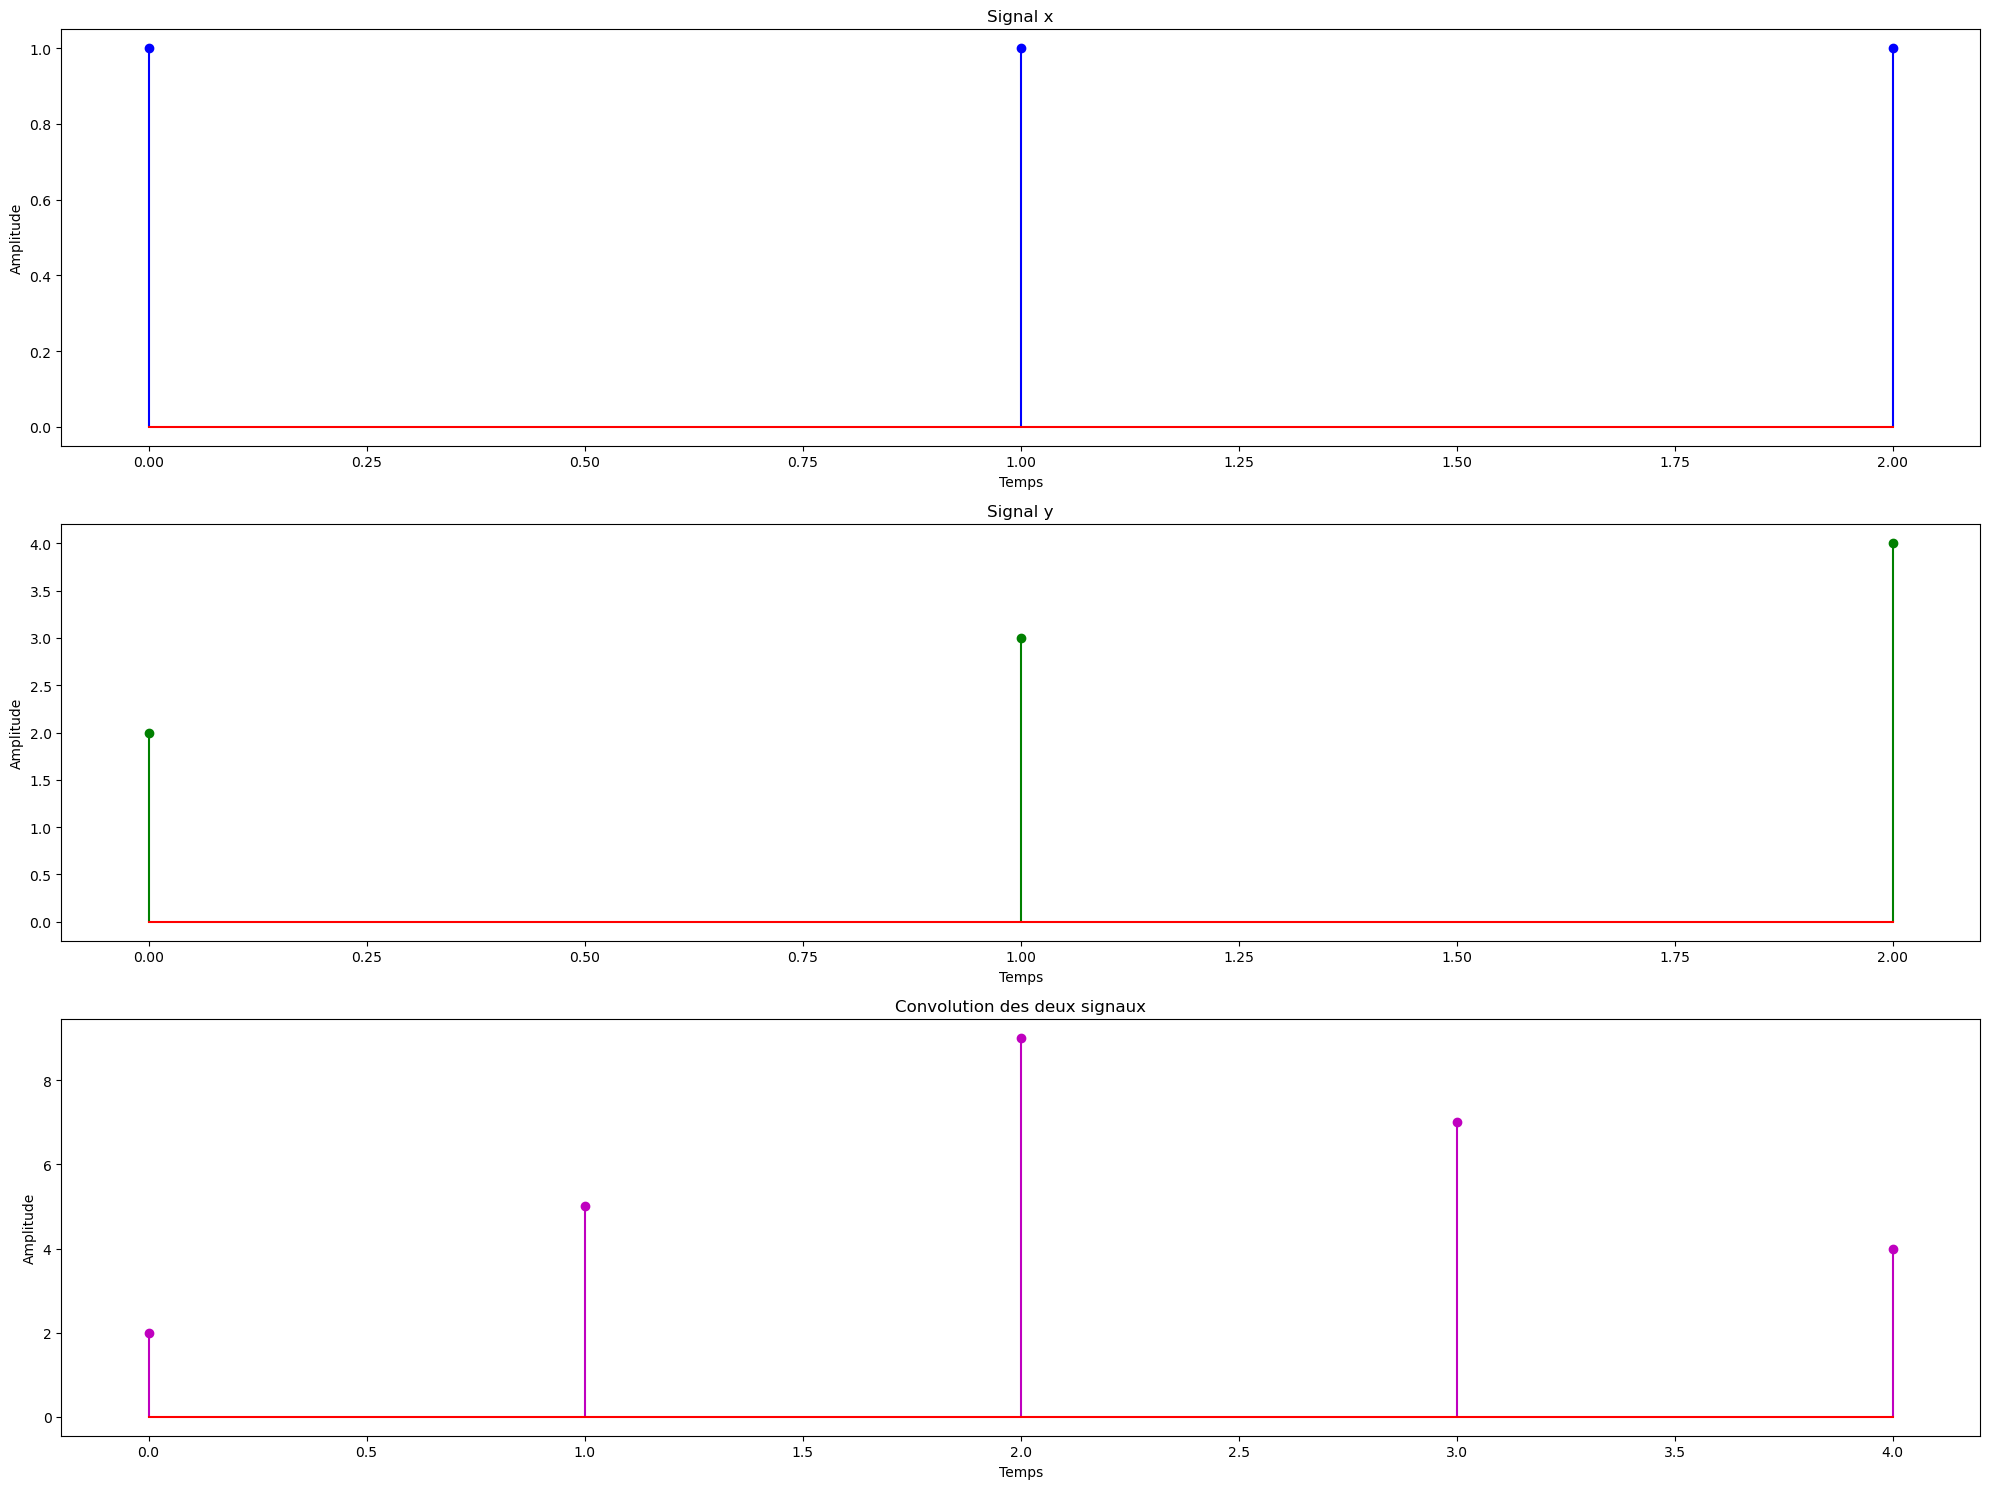

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def convolution(x, y):

    len_x = len(x)
    len_y = len(y)
    
    
    output_size = len_x+len_y - 1
    h = np.zeros(output_size)
    

    for i in range(len_x):
        for j in range(len_y):
            h[i + j] += x[i] * y[j]
    
    return h
x = list(map(float, input("Enter Signal X (values separated by spaces): ").split()))
y = list(map(float, input("Enter Signal Y (values separated by spaces): ").split()))

# Calcul de la convolution
resultat = convolution(x, y)

# Affichage des résultats
print("x:", x)
print("y:", y)
print("Convolution :", resultat)

np_result = np.convolve(x, y, mode='full')
print("Convolution :", np_result)
resultat = convolution(x, y)

np_result = np.convolve(x, y, mode='full')


plt.figure(figsize=(20, 15))

# Signal x
plt.subplot(3, 1, 1)
plt.stem(range(len(x)), x, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title("Signal x")
plt.xlabel("Temps")
plt.ylabel("Amplitude")

# Signal y
plt.subplot(3, 1, 2)
plt.stem(range(len(y)), y, linefmt='g-', markerfmt='go', basefmt='r-')
plt.title("Signal y")
plt.xlabel("Temps")
plt.ylabel("Amplitude")

# Convolution h
plt.subplot(3, 1, 3)
plt.stem(range(len(resultat)), resultat, linefmt='m-', markerfmt='mo', basefmt='r-')
plt.title("Convolution des deux signaux")
plt.xlabel("Temps")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()


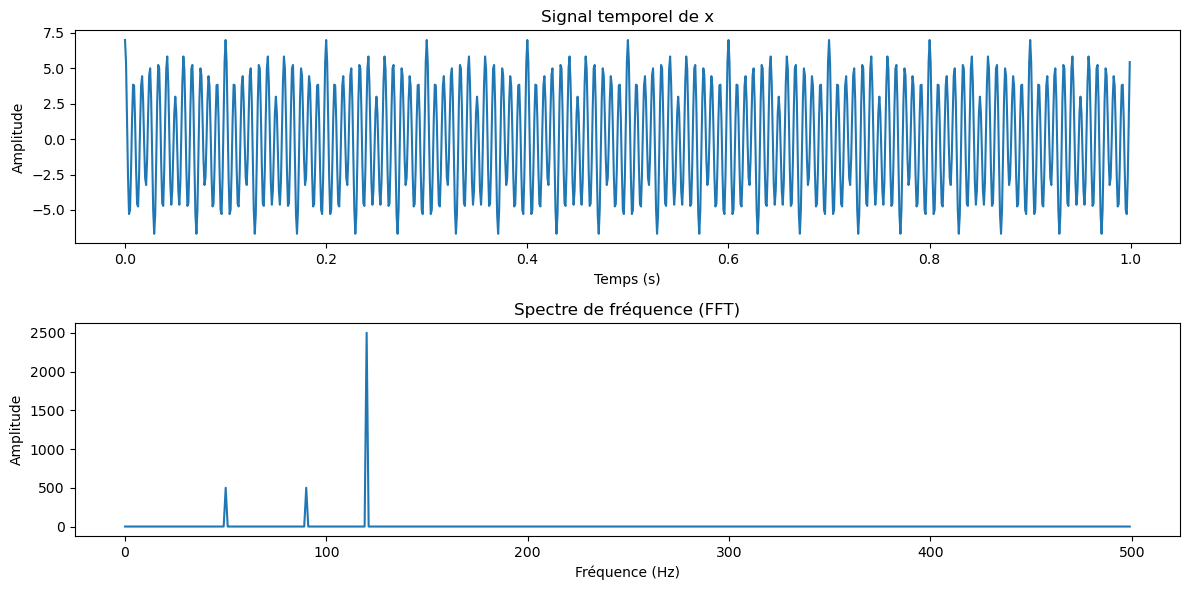

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Fs = 1000  # sampling frequency(Hz)
T = 1      # Durée (s)
t = np.linspace(0, T, int(Fs*T), endpoint=False)  # Axe temporel
f1 , f2 , f3 = 50 , 120 , 180 # sine frequency (Hz)
x = np.cos(2 * np.pi * f1 * t) + 5 * np.cos(2 * np.pi * f2 * t)+np.cos(np.pi* f3 * t)

# Calcul de la FFT
fft_result = np.fft.fft(x)
fft_frequency = np.fft.fftfreq(len(x), 1/Fs)  # Fréquences associées

#uniquement la partie positive du spectre
positive_freqs = fft_frequency[:len(fft_frequency)//2]
partie_positive = np.abs(fft_result[:len(fft_result)//2])

plt.figure(figsize=(12, 6))

# Signal temporel de x
plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.title("Signal temporel de x")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")

# Spectre de fréquence de x
plt.subplot(2, 1, 2)
plt.plot(positive_freqs, partie_positive)
plt.title("Spectre de fréquence (FFT)")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

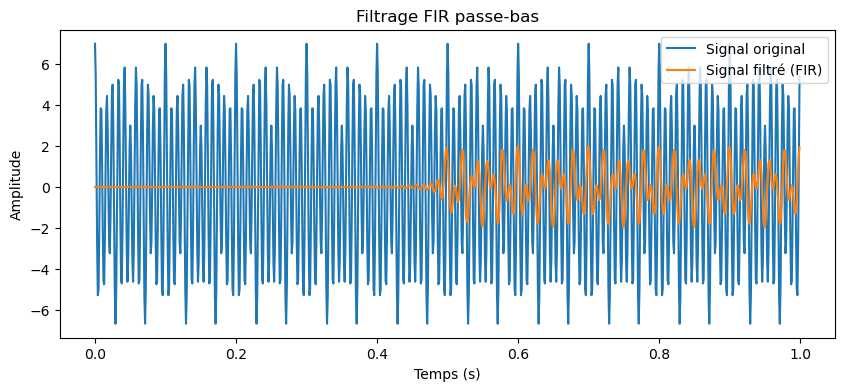

In [3]:
from scipy.signal import firwin, lfilter


cutoff = 100  # Fréquence de coupure (Hz)
numtaps = 1000  # Nombre de coefficients du filtre
fir_coeff = firwin(numtaps, cutoff, fs=Fs, pass_zero='lowpass')


x_filtre = lfilter(fir_coeff, 1.0, x)
plt.figure(figsize=(10, 4))
plt.plot(t, x, label="Signal original")
plt.plot(t, x_filtre, label="Signal filtré (FIR)")
plt.title("Filtrage FIR passe-bas")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

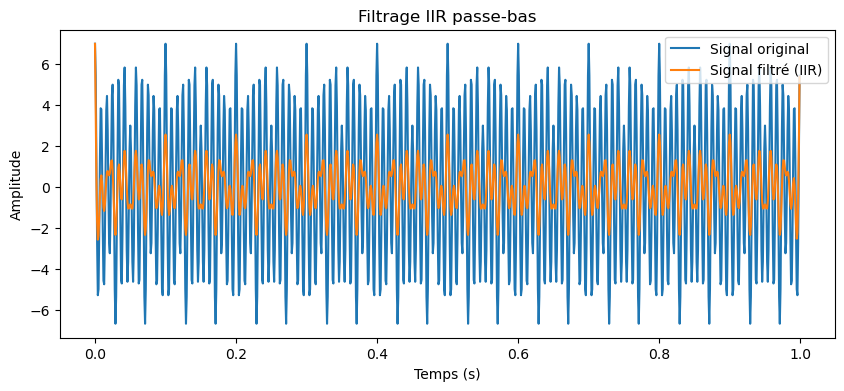

In [5]:
from scipy.signal import butter, filtfilt

# Conception d'un filtre IIR passe-bas
order = 4  # Ordre du filtre
cutoff_iir = 100  # Fréquence de coupure (Hz)
b , a = butter(order, cutoff_iir / (Fs / 2), btype='low')  

# Filtrage du signal
filtered_x_iir = filtfilt(b, a, x)

# Affichage du signal filtré
plt.figure(figsize=(10, 4))
plt.plot(t, x, label="Signal original")
plt.plot(t, filtered_x_iir, label="Signal filtré (IIR)")
plt.title("Filtrage IIR passe-bas")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()